4423680/4422102 [==============================] - 1s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


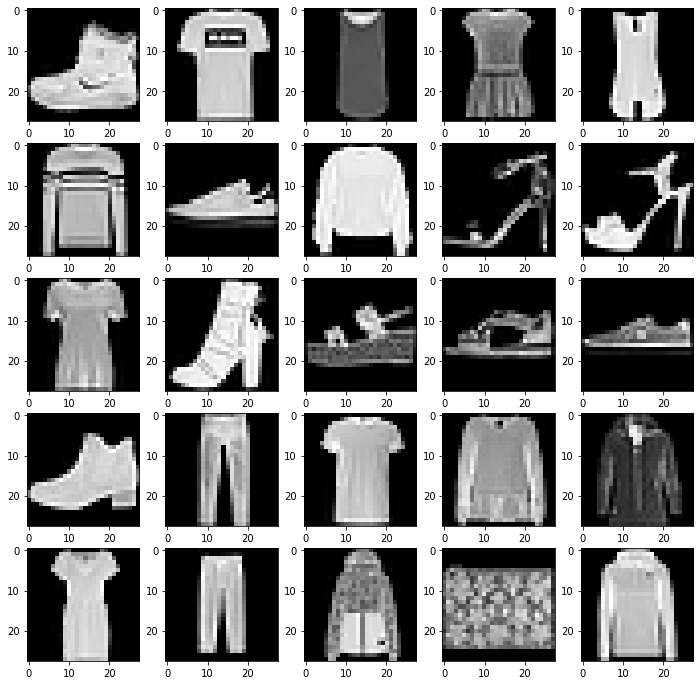

In [3]:
# loading and plotting the fashion mnist dataset
from tensorflow.keras.datasets.fashion_mnist import load_data
from matplotlib import pyplot
%matplotlib inline

# load dataset
(trainX, trainy), (testX, testy) = load_data()

# summarize loaded dataset
print(f'Train: X={trainX.shape}, y={trainy.shape}')
print(f'Test: X={testX.shape}, y={testy.shape}')

pyplot.figure(figsize=(12,12))
# plot first few images
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

## Fully Connected Layer

In [11]:
# Fully Connected Layer for image classification
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# step(1): load dataset
(x_train, y_train), (x_test, y_test) = load_data()

# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# determine the shape of the input images
in_shape = x_train.shape[1:]

# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)

# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#step(2): define model
model = Sequential()
model.add(Flatten(input_shape=in_shape))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(n_classes, activation='softmax'))
# step(3): define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# step(4): fit the model
hist = model.fit(x_train, y_train, epochs=30, batch_size=128, verbose=1)

#step(5):  evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {acc:.3f}')



(28, 28, 1) 10
Epoch 1/30
469/469 [==============================] - 5s 10ms/step - loss: 0.8070 - accuracy: 0.7254
Epoch 2/30
469/469 [==============================] - 5s 12ms/step - loss: 0.4039 - accuracy: 0.8533
Epoch 3/30
469/469 [==============================] - 5s 11ms/step - loss: 0.3512 - accuracy: 0.8712
Epoch 4/30
469/469 [==============================] - 6s 12ms/step - loss: 0.3199 - accuracy: 0.8836
Epoch 5/30
469/469 [==============================] - 6s 14ms/step - loss: 0.3018 - accuracy: 0.8888
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2897 - accuracy: 0.8911
Epoch 7/30
469/469 [==============================] - 5s 11ms/step - loss: 0.2689 - accuracy: 0.8998
Epoch 8/30
469/469 [==============================] - 5s 11ms/step - loss: 0.2649 - accuracy: 0.9002
Epoch 9/30
469/469 [==============================] - 5s 11ms/step - loss: 0.2553 - accuracy: 0.9044
Epoch 10/30
469/469 [==============================] - 6s 12ms/step - loss: 

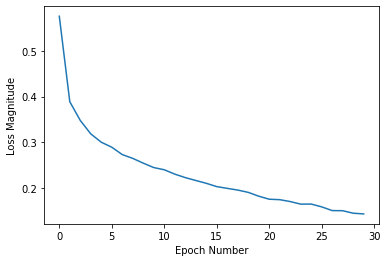

In [12]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['loss']);

In [13]:
model.save('fashion_model2.h5')